# TSP

In [1]:
# to install the salina library

# pip install git+https://github.com/facebookresearch/salina.git

In [1]:
import os
import sys

root = os.path.split(os.path.abspath(os.curdir))[0]
sys.path.append(root)
print('Appended root directory to sys.path:', root)

# --- imports ---

import torch
from types import SimpleNamespace
import matplotlib.pyplot as plt
from src.tsp import TSP, plot_tour
from src.train import train, evaluate
from src.models import Transformer

Appended root directory to sys.path: /home/davide/branch-cut-learn


## TSP components

![TSP](./assets/tsp.svg)

`InstanceAugmenter` can replace `Generator` when dealing with specific insances, and not random generated ones.

## Training: REINFORCE with POMO baseline

In [3]:
args = SimpleNamespace(
    # problem
    problem_size = 50,
    batch_size = 32,
    p_runs = 20,
    tot_batches = 1000,
    tot_batches_eval = 2,
    lr = 1e-3,
    seed = 1234,
    seed_eval = 42,
    device = 'cuda' if torch.cuda.is_available() else 'cpu',
    no_track = False,
    log_step = 100,
    project_name = 'TSP_with_RL',
    
    # network
    net_class = Transformer,
    embedding_dim = 128,
    feed_forward_dim = 128,
    num_attention_layers = 3,
    num_attention_heads = 8,
    )

tsp = TSP(args)
print('Number of parameters:', tsp.num_parameters())
train(tsp)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Number of parameters: 431104


wandb: Currently logged in as: dawoz. Use `wandb login --relogin` to force relogin


  0%|          | 0/1000 [00:00<?, ?it/s]

Train cost: 23.1531 +- 1.2639
Eval cost:  22.3966 +- 1.0120



 10%|▉         | 99/1000 [00:09<01:13, 12.18it/s]

Train cost: 8.4838 +- 0.6968
Eval cost:  8.2336 +- 0.3755



 20%|█▉        | 199/1000 [00:17<01:05, 12.25it/s]

Train cost: 7.4763 +- 0.4376
Eval cost:  7.4667 +- 0.3805



 30%|██▉       | 299/1000 [00:25<00:57, 12.23it/s]

Train cost: 6.9871 +- 0.3194
Eval cost:  6.8364 +- 0.2793



 40%|███▉      | 399/1000 [00:33<00:49, 12.20it/s]

Train cost: 6.6894 +- 0.4043
Eval cost:  6.5583 +- 0.2253



 50%|████▉     | 499/1000 [00:42<00:41, 12.10it/s]

Train cost: 7.6519 +- 0.7969
Eval cost:  7.3067 +- 0.5457



 60%|█████▉    | 599/1000 [00:50<00:33, 12.11it/s]

Train cost: 6.5617 +- 0.2374
Eval cost:  6.6636 +- 0.3415



 70%|██████▉   | 699/1000 [00:58<00:24, 12.20it/s]

Train cost: 6.4875 +- 0.2677
Eval cost:  6.3983 +- 0.2251



 80%|███████▉  | 799/1000 [01:07<00:16, 12.05it/s]

Train cost: 6.6595 +- 0.3463
Eval cost:  6.5638 +- 0.2657



 90%|████████▉ | 899/1000 [01:15<00:08, 12.08it/s]

Train cost: 7.0134 +- 0.3358
Eval cost:  7.0851 +- 0.3513



100%|█████████▉| 999/1000 [01:24<00:00, 11.87it/s]

Train cost: 6.5438 +- 0.3204
Eval cost:  6.3448 +- 0.1890



100%|██████████| 1000/1000 [01:24<00:00, 11.88it/s]


loss,█▁▁▄▅▅▇█▆▇█
train_cost,█▂▁▁▁▁▁▁▁▁▁
val_cost,█▂▁▁▁▁▁▁▁▁▁
loss,-0.33827
train_cost,6.54384
val_cost,6.34484


Dumb model: 22.356090545654297 +- 1.0985970497131348


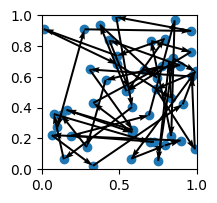

Trained model: 6.344841003417969 +- 0.1889718472957611


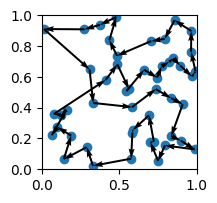

In [4]:
# dumb model
dumb = TSP(SimpleNamespace(**vars(args)))
mean, std, workspace = evaluate(dumb, return_workspace=True)
print('Dumb model:', mean, '+-', std)
x = workspace['data'].cpu()
tours = workspace['action'].cpu()
plot_tour(x[0], tours[:, 0, 0], figsize=(2,2))
plt.show()

# trained model
mean, std, workspace = evaluate(tsp, return_workspace=True)
print('Trained model:', mean, '+-', std)
x = workspace['data'].cpu()
tours = workspace['action'].cpu()
plot_tour(x[0], tours[:, 0, 0], figsize=(2,2))


### Generalization: TSP75 and TSP100

TSP75: 7.78621244430542 +- 0.26105520129203796


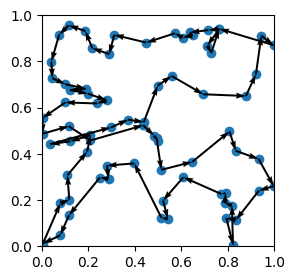

TSP100: 9.192830085754395 +- 0.27378129959106445


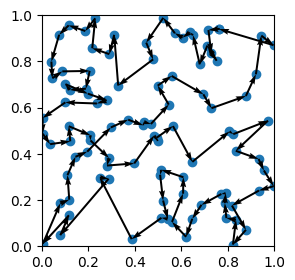

In [5]:
# generalization experiment on TSP50
tsp_gen = TSP(SimpleNamespace(**(vars(tsp.args))))
tsp_gen.load_state_dict(tsp.state_dict())
tsp_gen.args.problem_size = 75
tsp_gen.args.seed_eval = 4312

mean, std, workspace = evaluate(tsp_gen, return_workspace=True)
print(f'TSP{tsp_gen.args.problem_size}:', mean, '+-', std)
x = workspace['data'].cpu()
tours = workspace['action'].cpu()
plot_tour(x[0], tours[:, 0, 0], figsize=(3,3))
plt.show()

# generalization experiment on TSP100
tsp_gen.args.problem_size = 100

mean, std, workspace = evaluate(tsp_gen, return_workspace=True)
print(f'TSP{tsp_gen.args.problem_size}:', mean, '+-', std)
x = workspace['data'].cpu()
tours = workspace['action'].cpu()
plot_tour(x[0], tours[:, 0, 0], figsize=(3,3))